In [34]:
import sys
# the mock-0.3.1 dir contains testcase.py, testutils.py & mock.py
from get_data import get_data
from train import train,score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [26]:
length = len(ns)*len(augs)
data = {"n":[0]*length,
       "augs":[0]*length,
       "score":[0.0]*length,
       "vocab":[0]*length}
df = pd.DataFrame(data)

In [29]:
ns = [10,50,100,500,2000]
augs = [4,8,16,32,64]
scores = []

Xt, Yt = get_data(type="dev")

data = {f"n_{n}":[0]*len(augs) for n in ns}
df_acc = pd.DataFrame(data,index=[f"augs_{aug}" for aug in augs], dtype=float)
df_vocab = pd.DataFrame(data,index=[f"augs_{aug}" for aug in augs])
df

i = 0
for n in ns:
    for aug in augs:
        print(f"\neda_augs_{aug}_n_{n}")
        X,Y = get_data(type=f"eda_augs_{aug}_n_{n}")
        model, vocab = train( X, Y, epochs = 20, batch_size=64,embed_dim=100,lstm_dim=100,min_df=0)
        acc = score(model,vocab,Xt,Yt)
        scores.append((f"eda_augs_{aug}_n_{n}",acc))
        df_acc.at[f"augs_{aug}",f"n_{n}"] = acc
        df_vocab.at[f"augs_{aug}",f"n_{n}"] = len(vocab)
        df.at[i,"n"] = n
        df.at[i, "augs"] = aug
        df.at[i,"score"] = acc
        df.at[i,"vocab"] = len(vocab)
        i += 1


eda_augs_4_n_10
Length of vocab: 1929
Number of epochs = 20, Loss=1.013
Accuracy on dev set=0.524

eda_augs_8_n_10
Length of vocab: 2266
Number of epochs = 20, Loss=0.052
Accuracy on dev set=0.605

eda_augs_16_n_10
Length of vocab: 2827
Number of epochs = 20, Loss=0.029
Accuracy on dev set=0.569

eda_augs_32_n_10
Length of vocab: 3539
Number of epochs = 20, Loss=0.044
Accuracy on dev set=0.581

eda_augs_64_n_10
Length of vocab: 4424
Number of epochs = 20, Loss=0.100
Accuracy on dev set=0.58

eda_augs_4_n_50
Length of vocab: 5892
Number of epochs = 20, Loss=0.246
Accuracy on dev set=0.632

eda_augs_8_n_50
Length of vocab: 6916
Number of epochs = 20, Loss=0.378
Accuracy on dev set=0.655

eda_augs_16_n_50
Length of vocab: 8177
Number of epochs = 20, Loss=0.815
Accuracy on dev set=0.663

eda_augs_32_n_50
Length of vocab: 9528
Number of epochs = 20, Loss=1.955
Accuracy on dev set=0.68

eda_augs_64_n_50
Length of vocab: 11092
Number of epochs = 20, Loss=2.754
Accuracy on dev set=0.676

eda_

In [31]:
df

,n,augs,score,vocab
0,10,4,0.524,1929
1,10,8,0.605,2266
2,10,16,0.569,2827
3,10,32,0.581,3539
4,10,64,0.580,4424
5,50,4,0.632,5892
6,50,8,0.655,6916
7,50,16,0.663,8177
8,50,32,0.680,9528
9,50,64,0.676,11092


In [30]:
df_acc.to_csv("EDA_scores.csv")
df_vocab.to_csv("EDA_vocab_lengths.csv")
df.to_csv("EDA_results.csv")

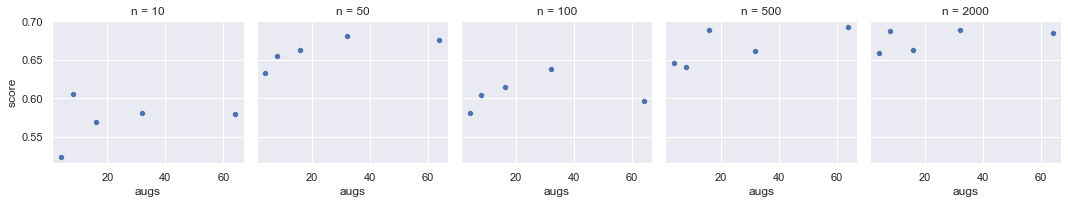

In [41]:
g = sns.FacetGrid(df,col="n")
g.map(sns.scatterplot,"augs","score")